In [69]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
# Load and Prepare Dataset

df = pd.read_csv('breast-cancer.csv') 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
# Remove 'id' column as it's not useful

df = df.drop('id',axis=1)  

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [77]:
# Convert diagnosis to binary

df['diagnosis']=df['diagnosis'].map({'M':1,'B':0}) 

In [79]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [81]:
# Feature and Target Split

x = df.drop('diagnosis', axis=1)  
y = df['diagnosis']

In [83]:
# Split Data into Train (60), Validation (20), and Test (20)

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=1, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=1, stratify=y_temp)

In [85]:
# KNN tuning using validation set

k_range = range(1, 21)
val_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    val_scores.append(knn.score(x_val, y_val))

Best K from validation set: 2


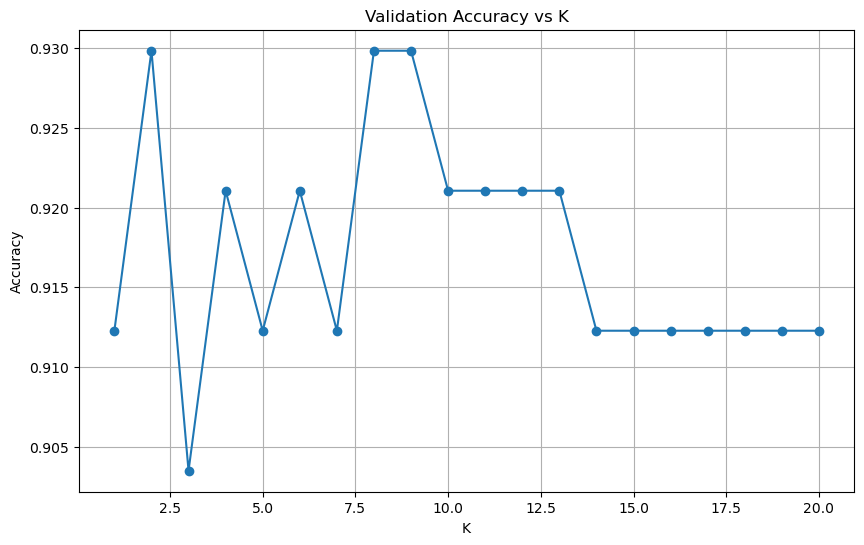

In [87]:
# Select Best K from Validation Results

best_k = k_range[np.argmax(val_scores)]
print("Best K from validation set:", best_k)

# Plot validation accuracy vs k

plt.figure(figsize=(10, 6))
plt.plot(k_range, val_scores, marker='o')
plt.title('Validation Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [89]:
# Train Final Model Using Best K

final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(x_train, y_train)

# Test Set Accuracy for Final Model

test_accuracy = final_model.score(x_test, y_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

Final Test Accuracy: 0.9298


In [91]:
# Validation accuracy using best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train, y_train)

# predictions on the test set
y_pred = knn_best.predict(x_test)

# Cross-validation mean accuracy on training set
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=best_k), x_train, y_train, cv=5)
cv_mean_accuracy = cv_scores.mean()
print(f"Cross-Validation Mean Accuracy: {cv_mean_accuracy:.4f}")

# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Calculate the accuracy on the validation set
val_accuracy = knn_best.score(x_val, y_val)
print(f"Validation Set Accuracy: {val_accuracy:.4f}")

Cross-Validation Mean Accuracy: 0.9062
Test Set Accuracy: 0.9298
Validation Set Accuracy: 0.9298


In [93]:
# Train Final KNN Model and Evaluate
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(x_train, y_train)
y_pred = knn_final.predict(x_test)

# Compute Evaluation Metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"Test Set Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Test Set Accuracy: 0.9298
Precision: 0.9730
Recall: 0.8372
F1-score: 0.9000


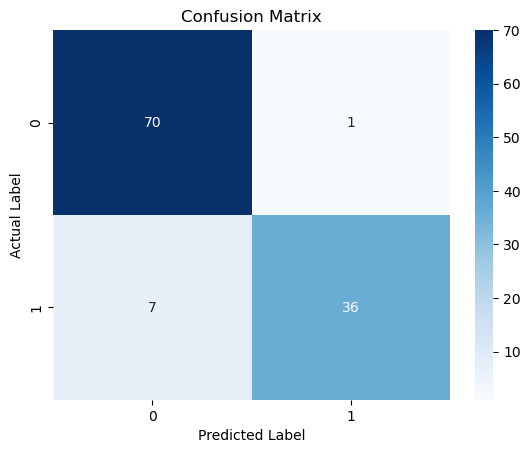

In [63]:
# Plot Confusion Matrix as Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

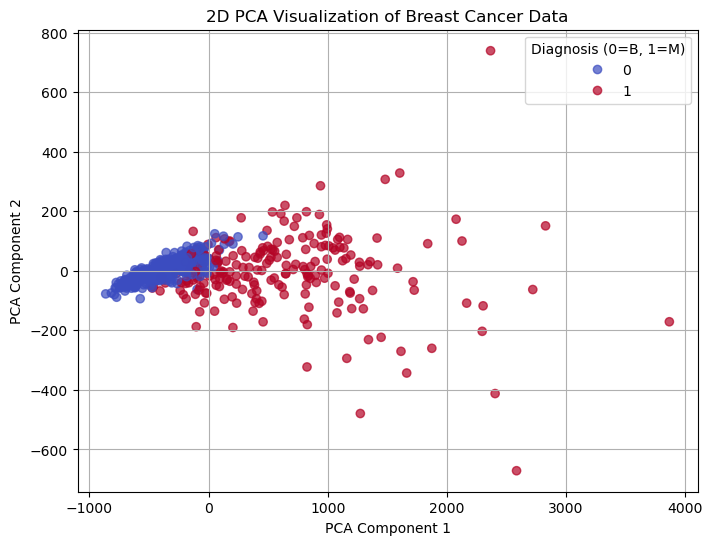

In [95]:
from sklearn.decomposition import PCA

# Apply PCA to reduce features to 2D
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Plot the 2D projection 
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Visualization of Breast Cancer Data')
plt.legend(*scatter.legend_elements(), title="Diagnosis (0=B, 1=M)")
plt.grid(True)
plt.show()